In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import os

drive_path = "/content/drive/My Drive/"
files = os.listdir(drive_path)

print("Files in My Drive:", files)


Files in My Drive: ['crime.csv', 'Colab Notebooks', 'Spam_Data.csv', 'DS MINIPRO295.docx', 'datafile.xls', 'SSOS Front Page_Updated.pdf', 'SSOS Front Page_Updated.gdoc', 'Classroom', 'AU1.gdoc', 'UNIT 1.gdoc', 'FLAT-All 5 Units (1).gdoc', 'FLAT-All 5 Units.gdoc', 'UNIT 2 REGULAR EXPRESSION.gdoc', '21AD1511-KEIS - Lab Manual.docx', 'Certificate ', 'Pic', 'ASSERTS ', 'IMG-20241025-WA0006.jpg', 'LIST OF ABBREVIATIONS.gdoc', 'TABLE OF CONTENTS.gdoc', '9ecd797c-c71d-4616-a012-cf99681b1f2d_copy.pdf', '21AD1502 DCNS QB-student_copy.pdf', 'fitzpatrick17k.csv', 'datasets', 'TestImages', 'Selfintro ', '21ML1601 - Unit 2 - Quiz 3.gform', 'skin_disease_model.h5', 'ppt08.pptx', 'skin_disease_cnn_model.h5', 'An_Automatic_Dermatology_Detection_System_Based_on_Deep_Learning_and_Computer_Vision (1).pdf', 'Recent_Advances_in_Diagnosis_of_Skin_Lesions_Using_Dermoscopic_Images_Based_on_Deep_Learning.pdf', 'Advancing_Skin_Disease_Diagnosis_A_Multimodal_Approach_Utilizing_Telegram_Api_Token_Chatbot_for_Text

In [3]:
from tensorflow import keras

model_path = "/content/drive/My Drive/skin_disease_cnn_model.h5"  # Change if needed

# Load the model
model = keras.models.load_model(model_path)
# Get class names (same as folder names)
class_names = ['Actinic Keratosis', 'Basal Cell Carcinoma', 'Eczema', 'Acne', 'Eksim', 'Herpes', 'Melanoma', 'Panu', 'Rosacea']

print("✅ Model loaded successfully!")


✅ Model loaded successfully!


In [4]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import filedialog
from tensorflow.keras.preprocessing import image

In [5]:
from google.colab import files

def select_image():
    uploaded = files.upload()  # Upload image manually
    file_path = list(uploaded.keys())[0]  # Get the uploaded file path
    return file_path


In [6]:
def predict_disease(img_path):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize pixel values

    # Predict using the trained model
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions)  # Get index of highest probability
    confidence = np.max(predictions)  # Get confidence score

    # Define confidence threshold (adjust if needed)
    threshold = 0.60  # 60% confidence required

    if confidence >= threshold:
        return class_names[predicted_class], confidence
    else:
        return "No disease detected", confidence


In [7]:
def highlight_affected_area(img_path):
    # Load image
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply threshold to detect affected area
    _, thresholded = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY_INV)

    # Find contours (areas of skin condition)
    contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw contours on the original image
    for contour in contours:
        cv2.drawContours(img, [contour], -1, (0, 255, 0), 3)  # Green color

    # Display the highlighted image
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()


Saving melanoma_5051.jpg to melanoma_5051.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Prediction: Melanoma (Confidence: 1.00)
Highlighting affected area...


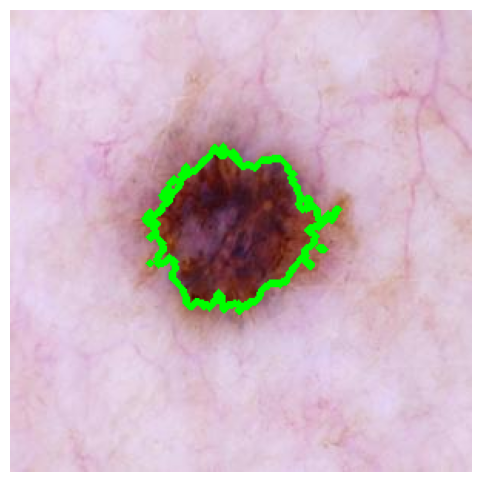

In [12]:
# Select an image (Manual Upload in Colab)
image_path = select_image()

# Predict the disease
predicted_disease, confidence = predict_disease(image_path)

# Show result
print(f"Prediction: {predicted_disease} (Confidence: {confidence:.2f})")

# Highlight affected area if a disease is detected
if predicted_disease != "No disease detected":
    print("Highlighting affected area...")
    highlight_affected_area(image_path)
